In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('classic')
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [79]:
test = pd.read_csv('Air_pollution_test.csv')
train = pd.read_csv('Air_pollution_train.csv')

In [80]:
train['Date'] = pd.to_datetime(train['Date'], format='%d/%m/%Y')
test['Date'] = pd.to_datetime(test['Date'], format='%d/%m/%Y')
train = train.iloc[: , :-2]
test = test.iloc[: , :-2]

In [81]:
#Keep only the Temperature and Relative Humidity
trainscalar = train.drop(columns=['Value','Date','Gas']).values
testscalar = test.drop(columns=['id','Date','Gas']).values
scalarvalues = np.concatenate((trainscalar, testscalar), axis=0)

In [82]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(scalarvalues)
trainscalar = minmax.transform(trainscalar)
testscalar = minmax.transform(testscalar)

train['T'] = trainscalar[:,0]
train['RH'] = trainscalar[:,1]
test['T'] = testscalar[:,0]
test['RH'] = testscalar[:,1]

In [83]:
CO = train[train['Gas']=='CO']
NO2 = train[train['Gas']=='NO2']
O3 = train[train['Gas']=='O3']
HC = train[train['Gas']=='HC']
CO.drop(CO.columns.difference(['Date','Value']), 1, inplace=True)
NO2.drop(NO2.columns.difference(['Date','Value']), 1, inplace=True)
O3.drop(O3.columns.difference(['Date','Value']), 1, inplace=True)
HC.drop(HC.columns.difference(['Date','Value']), 1, inplace=True)
CO.rename(columns = {'Value':'CO_Value'}, inplace = True)
NO2.rename(columns = {'Value':'NO2_Value'}, inplace = True)
O3.rename(columns = {'Value':'O3_Value'}, inplace = True)
HC.rename(columns = {'Value':'HC_Value'}, inplace = True)
merge = pd.merge(CO,NO2,on='Date')
merge = pd.merge(merge,O3,on='Date')
NewDF = pd.merge(merge,HC,on='Date')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: 

In [84]:
from sklearn.preprocessing import MinMaxScaler
minmaxVal = MinMaxScaler()
toScale = NewDF.drop(columns=['Date']).values
minmaxVal.fit(toScale)
valueScale = minmaxVal.transform(toScale)

NewDF['CO_Value'] = valueScale[:,0]
NewDF['NO2_Value'] = valueScale[:,1]
NewDF['O3_Value'] = valueScale[:,2]
NewDF['HC_Value'] = valueScale[:,3]

In [85]:
mergeDF = train.drop(columns=['Gas','Value'])
mergeDF = mergeDF.drop_duplicates(subset='Date', keep="last") 
trainH = pd.merge(mergeDF,NewDF,on='Date')
trainH = trainH.set_index('Date', drop=True)

In [86]:
trainH.describe()

,T,RH,CO_Value,NO2_Value,O3_Value,HC_Value
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,0.908312,0.853327,0.730051,0.538999,0.589272,0.715056
std,0.159161,0.153919,0.149450,0.128852,0.164040,0.153103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.911544,0.840785,0.685258,0.483114,0.501086,0.661367
50%,0.939203,0.875401,0.747240,0.545145,0.598216,0.734422
75%,0.968065,0.917568,0.807280,0.608371,0.692009,0.810004
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


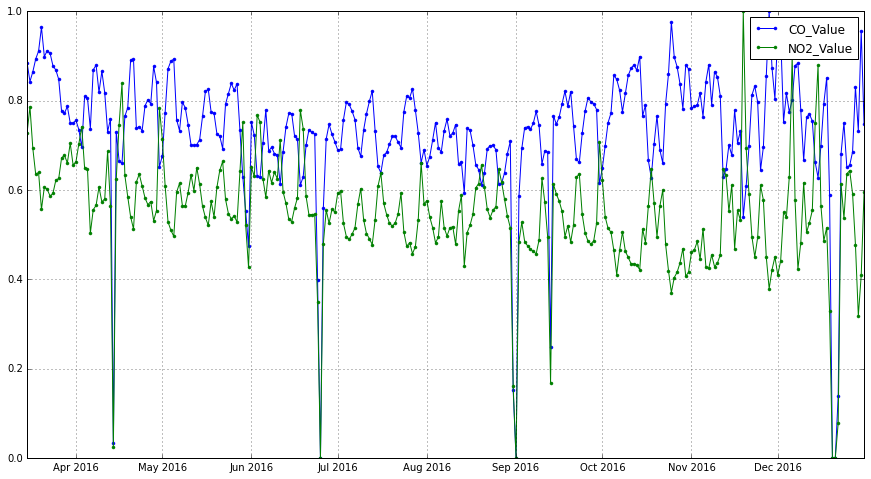

In [87]:
ShowDF = trainH[trainH.index < '2017']
Gases = ['CO_Value','NO2_Value','O3_Value','HC_Value']
Gases = Gases[:2]
plt.plot(ShowDF.index,ShowDF[Gases[0]],marker='.', color='b', label= Gases[0])
plt.plot(ShowDF.index,ShowDF[Gases[1]], marker = '.', color = 'g',label = Gases[1])
plt.grid()
plt.legend();

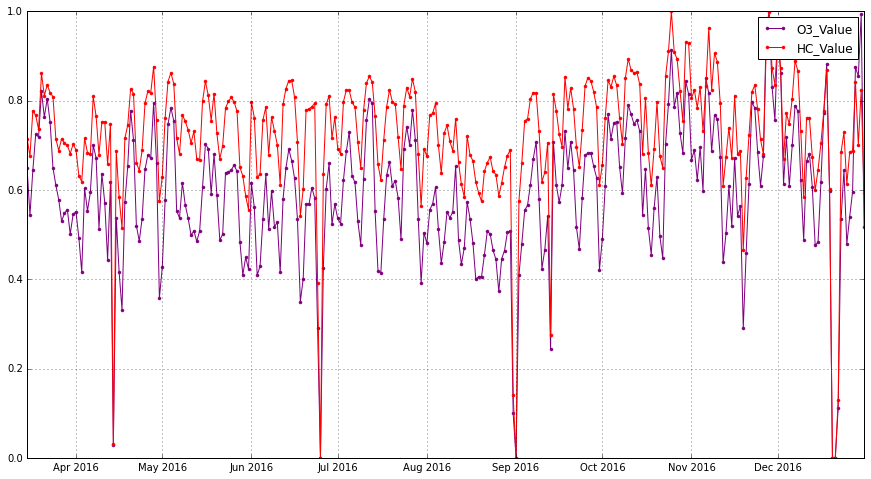

In [88]:
ShowDF = trainH[trainH.index < '2017']
Gases = ['CO_Value','NO2_Value','O3_Value','HC_Value']
Gases = Gases[2:]
plt.plot(ShowDF.index,ShowDF[Gases[0]],marker='.', color='purple', label= Gases[0])
plt.plot(ShowDF.index,ShowDF[Gases[1]], marker = '.', color = 'r',label = Gases[1])
plt.grid()
plt.legend();

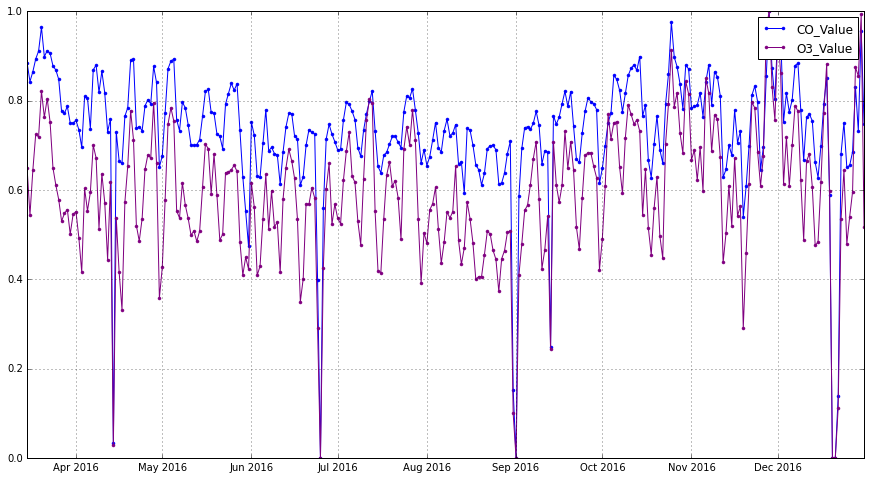

In [89]:
ShowDF = trainH[trainH.index < '2017']
Gases = ['CO_Value','NO2_Value','O3_Value','HC_Value']
Gases = [Gases[0],Gases[2]]
plt.plot(ShowDF.index,ShowDF[Gases[0]],marker='.', color='b', label= Gases[0])
plt.plot(ShowDF.index,ShowDF[Gases[1]], marker = '.', color = 'purple',label = Gases[1])
plt.grid()
plt.legend();

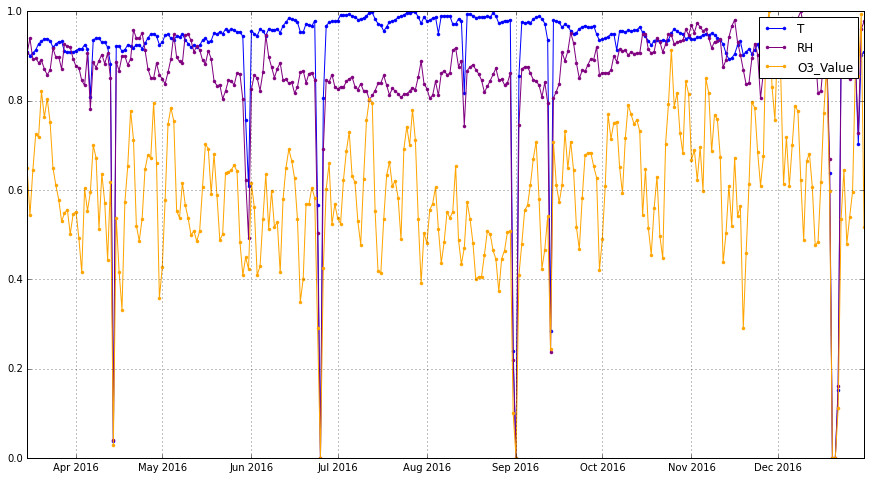

In [90]:
ShowDF = trainH[trainH.index < '2017']
feature = ['T','RH','CO_Value','NO2_Value','O3_Value','HC_Value']
plt.plot(ShowDF.index,ShowDF[feature[0]],marker='.', color='b', label= feature[0])
plt.plot(ShowDF.index,ShowDF[feature[1]], marker = '.', color = 'purple',label = feature[1])
plt.plot(ShowDF.index,ShowDF[feature[4]], marker = '.', color = 'orange',label = feature[4])
plt.grid()
plt.legend();

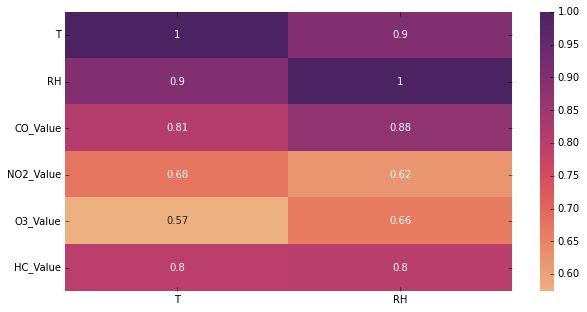

In [91]:
corr = trainH.corr()
corr = corr.head(2)
corr = corr.transpose()
plt.figure(figsize = (10,5))
sns.heatmap(corr, annot=True,cmap="flare")
plt.show()

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
def twoSer(feature):
  toDecom = trainH.drop(trainH.columns.difference([feature]), 1)
  toDecom.sort_index(inplace=True)
  return(toDecom)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


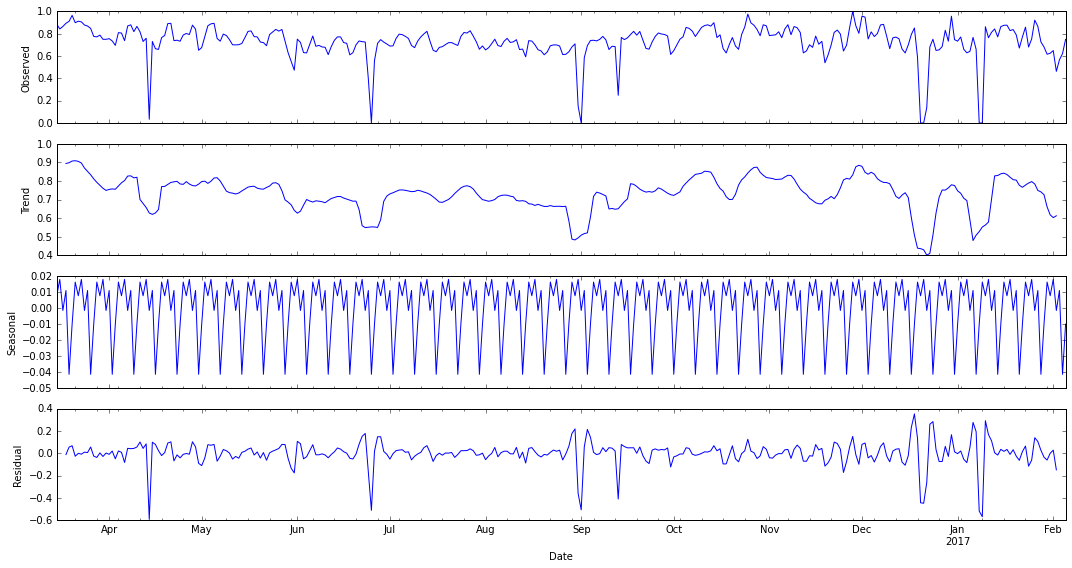

In [93]:
toDecom = twoSer('CO_Value')
result = seasonal_decompose(x=toDecom['CO_Value'], model='additive')
result.plot()
plt.show()

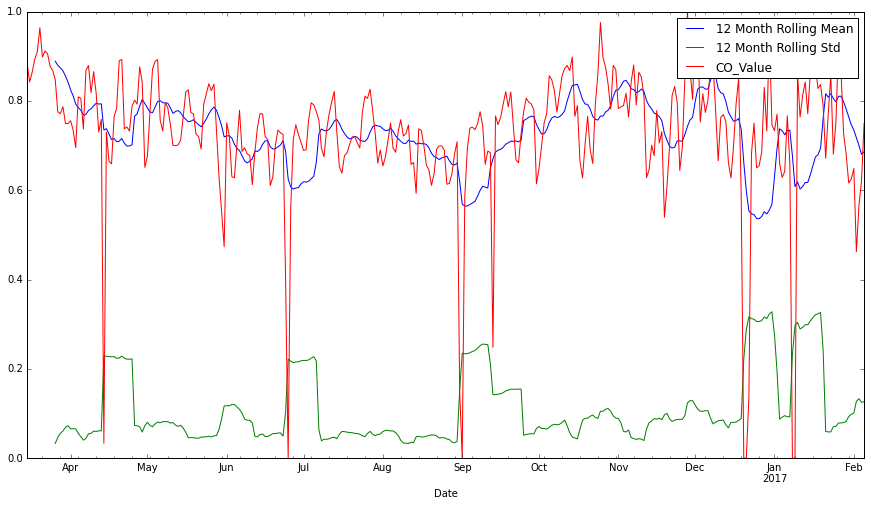

In [94]:
toDecom = toDecom.squeeze()
toDecom.rolling(12).mean().plot(label='12 Month Rolling Mean')
toDecom.rolling(12).std().plot(label='12 Month Rolling Std')
toDecom.plot()
plt.legend()

Using the visual test CO_Value should not be Stationary,

Mean is not constant,

Std is not constant,

No seasonality ✔️

In [96]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(toDecom)
print(f'Number of observation:{adftest[3]}\n p-value:{adftest[1]}')

Number of observation:326
 p-value:2.6870035539955553e-16


Using the Augmented Dickey Fuller Test, The dataset is Stationary

if the series is non-stationary no differencing is needed, that is, d=0.

In [110]:
toDecom.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328 entries, 2016-03-15 to 2017-02-05
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO_Value  328 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


In [112]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, axes = plt.subplots(1, 2, sharex=True)
#toDecom = toDecom.to_frame()
axes[0].plot(toDecom.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(toDecom.diff(), ax=axes[1])

plt.show()

ValueError: ignored